In [36]:
#Problem 5-1: Bayesian Classifier
#Xingchen Zhou

In [37]:
import scipy.io
import numpy as np
import math
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [38]:
mat = scipy.io.loadmat('hw1data.mat')

In [39]:
X = np.array(mat['X'])
Y = np.array(mat['Y'])
print(X.shape)
print(Y.shape)

(10000, 784)
(10000, 1)


In [40]:
#Preprosessing data
X = SelectKBest(chi2, k=200).fit_transform(X, Y)
X = scale(X * 1.0)
print(X.shape)
print(Y.shape)

(10000, 200)
(10000, 1)


In [41]:
def train(X, Y):
    cPrior = [] #cPrior[i] is the number of occurrence of label i in Y
    mui = [] #Stores a list of u for 10 gassuian models respectively
    covariance_matrices = []

    for i in range(10):
        cPrior.append(0.0)
        mui.append(np.zeros(shape=(200,1)))
        covariance_matrices.append(np.zeros(shape=(200,200)))

    for label in Y:
        cPrior[label[0]] += 1    

    print(cPrior)
    print(mui[0].shape)
    print(covariance_matrices[0].shape)
    
    #Initilize mui
    for i in range(len(X)):
        mui[Y[i][0]] += np.matrix(X[i]).T

    for i in range(10):
        mui[i] /= cPrior[i] 
        
    #Initilize covariance matrix
    for i in range(len(X)):
        covariance_matrices[Y[i][0]] += (np.matrix(X[i]).T - mui[Y[i][0]]) @ (np.matrix(X[i]).T - mui[Y[i][0]]).T

    for i in range(10):
        covariance_matrices[i] /= cPrior[i]
        covariance_matrices[i] += np.identity(len(X[0])) * 0.1
    
    return mui, covariance_matrices

In [42]:
def bayesian_classifier(mui, covariance_matrices, x):
    maxP = 0
    label = 0
    for i in range(10):
        probability =  1/ math.sqrt(np.linalg.det(covariance_matrices[i]) )   * pow(2*math.pi,-100)* \
        pow(math.e, -1/2 * float(((np.matrix(x).T - mui[i]).T @ np.linalg.inv(covariance_matrices[i]) @ (np.matrix(x).T - mui[i]))[0][0])) * \
        cPrior[i] / 10000.0
        if probability > maxP: 
            label = i
            maxP = probability
    return label

In [46]:
def test_accuracy(mui, covariance_matrices, X_test, Y_test):
    time = 0
    for i in range(len(X_test)):
        if bayesian_classifier(mui, covariance_matrices, X_test[i]) == Y_test[i][0]: time += 1
    return time / len(X_test)

In [47]:
def test():
    ratio = [i * 1000 for i in range(1,10)]
    accuracy = []
    for i in ratio:
        X_train = X[:i]
        Y_train = Y[:i]
        X_test = X[i:]
        Y_test = Y[i:]
        mui, covariance_matrices = train(X_train, Y_train)
        accuracy.append(test_accuracy(mui, covariance_matrices, X_test, Y_test))
    return accuracy

In [48]:
accuracy_list = test()

[99.0, 96.0, 79.0, 109.0, 109.0, 91.0, 98.0, 107.0, 108.0, 104.0]
(200, 1)
(200, 200)
[208.0, 208.0, 183.0, 220.0, 190.0, 199.0, 184.0, 228.0, 189.0, 191.0]
(200, 1)
(200, 200)
[308.0, 332.0, 279.0, 322.0, 274.0, 298.0, 282.0, 324.0, 289.0, 292.0]
(200, 1)
(200, 200)
[400.0, 454.0, 364.0, 425.0, 374.0, 391.0, 372.0, 425.0, 393.0, 402.0]
(200, 1)
(200, 200)
[496.0, 560.0, 468.0, 518.0, 475.0, 479.0, 470.0, 519.0, 501.0, 514.0]
(200, 1)
(200, 200)
[590.0, 666.0, 563.0, 637.0, 581.0, 555.0, 587.0, 623.0, 587.0, 611.0]
(200, 1)
(200, 200)
[695.0, 777.0, 638.0, 751.0, 694.0, 640.0, 689.0, 740.0, 672.0, 704.0]
(200, 1)
(200, 200)
[788.0, 888.0, 747.0, 847.0, 790.0, 717.0, 804.0, 833.0, 777.0, 809.0]
(200, 1)
(200, 200)
[875.0, 1020.0, 829.0, 955.0, 872.0, 814.0, 912.0, 928.0, 879.0, 916.0]
(200, 1)
(200, 200)


In [49]:
print(accuracy_list)

[0.8686666666666667, 0.87725, 0.886, 0.891, 0.889, 0.89125, 0.8926666666666667, 0.9, 0.9]


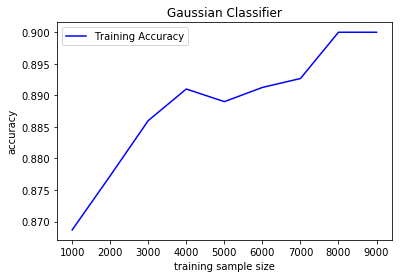

In [51]:
import matplotlib.pyplot as plt
training_sample_size = [i * 1000 for i in range(1,10)]

plt.plot(training_sample_size, accuracy_list, '-b', label = "Training Accuracy")
plt.legend()
plt.xlabel("training sample size")
plt.ylabel("accuracy")
plt.title("Gaussian Classifier")
plt.show()
